# paper: FRB 220207aabh

In [2]:
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software/burstfit/examples/')
import import_ipynb
import burstfit.BurstFit_paper_template as paper_fit

from burstfit.utils.functions import pulse_fn, sgram_fn, gauss, gauss_norm, model_free_4, model_free_normalized_4, power_law # pulse_fn_vec  
import numpy as np

%matplotlib inline 

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

datacite/tind env not found. Cannot use datacite API


In [3]:
# input variables 
candidate = '220207aabh'
datestring = '2022_2_6_19_34_4'
beam = 136
corr = 'corr09'
dm_heimdall = 263.0
width_heimdall = 2  
snr_heimdall = 60.0

voltage = True
dedisperse = False 
fil_file = '/home/ubuntu/vikram/scratch/' + candidate + '.fil'
mask_chans=[] 
nfreq = 4 
fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq, str(voltage))

2022-07-07 22:27:03,131 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-07-07 22:27:03,175 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-07-07 22:27:03,178 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-07-07 22:27:03,188 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (24.440649605314498, 24.27127121003559)


using filterbank  /data/dsa110/T1/corr09/2022_2_6_19_34_4/fil_220207aabh/220207aabh_136.fil


2022-07-07 22:27:03,207 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-07-07 22:27:06,492 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-07-07 22:27:06,496 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-07-07 22:27:06,499 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (masked, masked)


using filterbank  /home/ubuntu/vikram/scratch/220207aabh.fil
data_burst.mean(0), data_burst.mean(0) [-2.82880217e-01  3.46124649e-01  9.31423604e-02  1.91634484e-02
  4.13012028e-01  8.88120770e-01 -6.34947598e-01  7.98619032e-01
  4.09753144e-01  3.99978846e-01 -5.51770449e-01  6.06006444e-01
  1.64629415e-01 -6.43764019e-01 -1.93954587e-01 -2.09862560e-01
 -6.35522544e-01  2.82879084e-01 -1.13269314e-01 -3.58391941e-01
 -2.64098555e-01 -4.45019960e-01 -1.73446938e-01 -8.04954767e-02
  2.03918681e-01 -3.45551908e-01  5.27238071e-01  1.32240772e-01
  1.68845013e-01  5.10371089e-01  3.38651299e-01 -7.67571211e-01
  6.99530542e-02 -1.24582052e-02  6.96275115e-01 -4.54603374e-01
  3.82156193e-01 -2.34776735e-01  2.56240010e-01  6.35904372e-01
  9.15526807e-01  1.34155393e-01 -2.58348942e-01 -3.45167845e-01
 -6.69445157e-01  2.14842930e-01 -3.58391970e-01 -6.23065472e-01
 -6.85926974e-01 -2.49724567e-01  1.63863510e-01 -4.94274497e-01
  4.22403395e-01  6.13480926e-01 -9.39102411e-01  1.880

  4.97147024e-01  4.42911088e-01  8.16442817e-02 -6.77494586e-01]


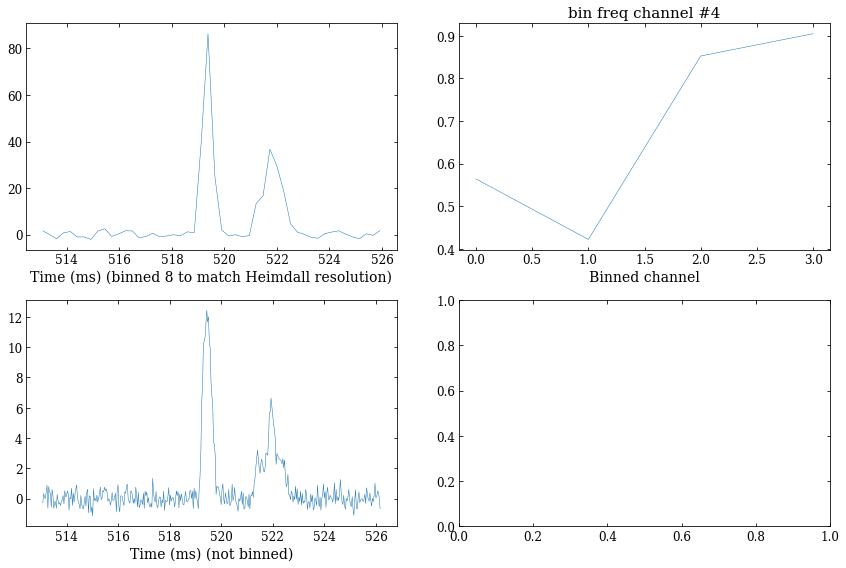

In [5]:
bd_heimdall, fil_file_heimdall  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=False)

bd, fil_file  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=True)


data_burst = paper_fit.prepare_burst_data(fil_file, fil_file_dedispersed, candidate, bd_heimdall, bd, voltage = voltage,
                                t_chop_center_s=0.5, t_chop_width = 50 * width_heimdall, 
                               dedisperse=dedisperse, nfreq = nfreq)

## S1: Spectrum--  4 channels, normalized
## T1: Time profile-- Gaussian 
## T2: Time profile-- Gaussian + scattering
## cx: x-components in time profile 

### No scattering

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 08:19:40,739 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 08:19:40,741 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 08:19:40,748 - tests -root - INFO - P values: T-test (0.89137), Kruskal (0.80646), KS (0.95226), F-test (0.18550)
2022-06-08 08:19:40,750 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 08:19:40,755 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00000)
2022-06-08 08:19:40,758 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 08:19:40,762 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00000)
2022-06-08 08:19:40,766 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 08:19:40,773 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 08:19:40,775 - initial_profi

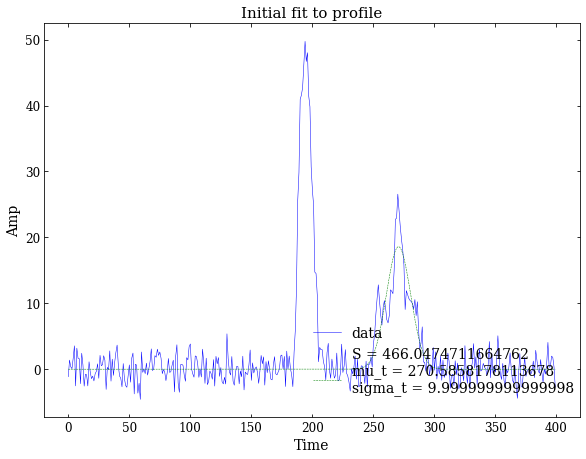

2022-06-08 08:19:41,197 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 08:19:41,200 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7fe5d2a68400>
[0.33020866 0.26602912 0.3592513  0.4192306 ]


2022-06-08 08:19:41,206 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 08:19:41,208 - initial_spectrafit -burstfit.fit - INFO - c0: 0.3302086591720581 +- 0.0
2022-06-08 08:19:41,210 - initial_spectrafit -burstfit.fit - INFO - c1: 0.26602911949157715 +- 0.0
2022-06-08 08:19:41,211 - initial_spectrafit -burstfit.fit - INFO - c2: 0.3592512905597687 +- 0.0


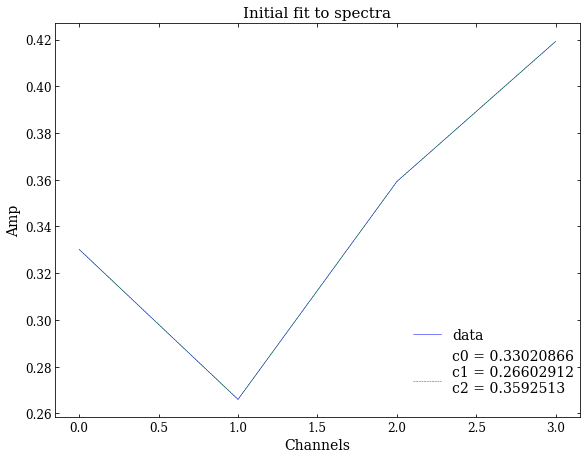

2022-06-08 08:19:41,531 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 08:19:41,533 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.33020866, 0.26602912, 0.3592513, 466.0474711664762, 270.5858178113678, 9.999999999999998, 263.0]
2022-06-08 08:19:41,600 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 08:19:41,603 - sgram_fit -burstfit.fit - INFO - c0: 0.3067295807762167 +- 0.03958841981392922
2022-06-08 08:19:41,604 - sgram_fit -burstfit.fit - INFO - c1: 0.258571173154317 +- 0.03262475192687486
2022-06-08 08:19:41,606 - sgram_fit -burstfit.fit - INFO - c2: 0.3787070208989326 +- 0.03216481326971891
2022-06-08 08:19:41,607 - sgram_fit -burstfit.fit - INFO - S: 368.24708831516006 +- 9.977092705999707
2022-06-08 08:19:41,609 - sgram_fit -burstfit.fit - INFO - mu_t: 273.850488630509 +- 1.7118438994809517
2022-06-08 08:19:41,611 - sgram_fit -burstfit.fit - INFO - sigma_t: 10.943417279626681 +- 0.323283371

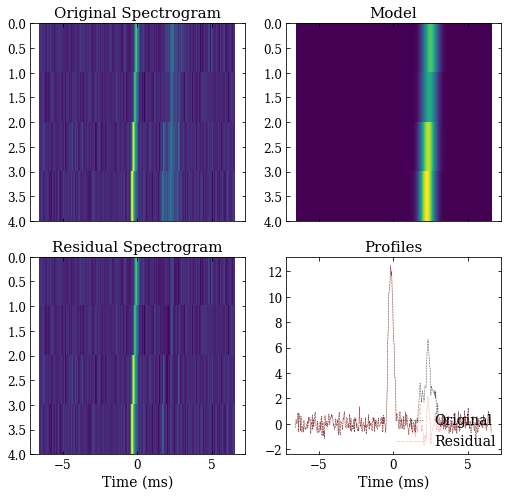

2022-06-08 08:19:42,702 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:19:42,704 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:19:42,706 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:19:42,708 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 08:19:42,709 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:19:42,711 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:19:42,714 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.7915222492904027
2022-06-08 08:19:42,715 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 08:19:42,717 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-08 08:19:42,718 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to

{bf}.calc_redchisq()= 0.7915222492904027


In [17]:
bf_S1T1_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 180, 0),(np.inf, 300, 5*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 08:19:49,386 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 08:19:49,388 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 08:19:49,391 - tests -root - INFO - P values: T-test (0.89137), Kruskal (0.80646), KS (0.95226), F-test (0.18550)
2022-06-08 08:19:49,393 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 08:19:49,396 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00000)
2022-06-08 08:19:49,398 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 08:19:49,401 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00000)
2022-06-08 08:19:49,403 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 08:19:49,406 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 08:19:49,409 - initial_profi

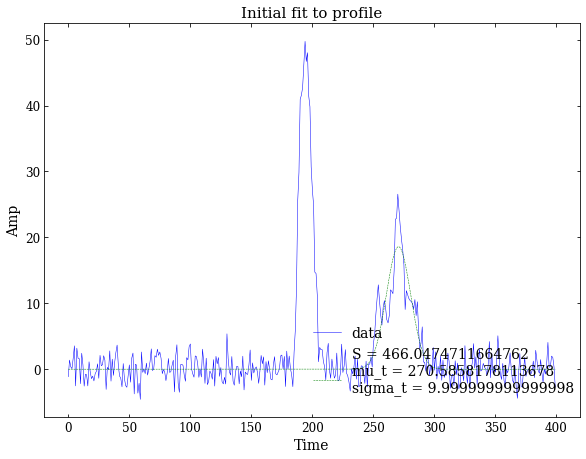

2022-06-08 08:19:49,661 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 08:19:49,667 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7fe5d2a68400>
[0.33020866 0.26602912 0.3592513  0.4192306 ]


2022-06-08 08:19:49,674 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 08:19:49,676 - initial_spectrafit -burstfit.fit - INFO - c0: 0.3302086591720581 +- 0.0
2022-06-08 08:19:49,678 - initial_spectrafit -burstfit.fit - INFO - c1: 0.26602911949157715 +- 0.0
2022-06-08 08:19:49,680 - initial_spectrafit -burstfit.fit - INFO - c2: 0.3592512905597687 +- 0.0


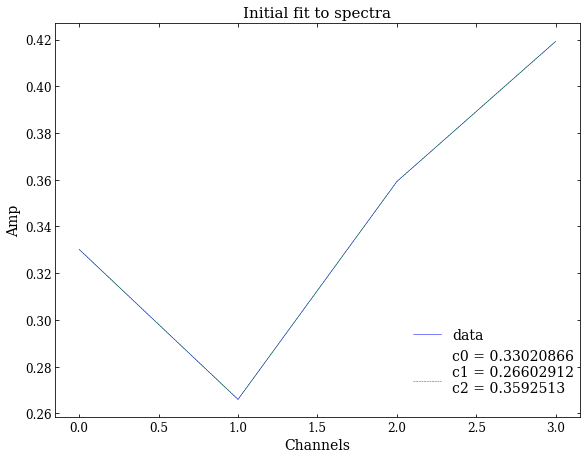

2022-06-08 08:19:50,125 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 08:19:50,128 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.33020866, 0.26602912, 0.3592513, 466.0474711664762, 270.5858178113678, 9.999999999999998, 263.0]
2022-06-08 08:19:50,223 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 08:19:50,227 - sgram_fit -burstfit.fit - INFO - c0: 0.3067295807762167 +- 0.03958841981392922
2022-06-08 08:19:50,229 - sgram_fit -burstfit.fit - INFO - c1: 0.258571173154317 +- 0.03262475192687486
2022-06-08 08:19:50,231 - sgram_fit -burstfit.fit - INFO - c2: 0.3787070208989326 +- 0.03216481326971891
2022-06-08 08:19:50,233 - sgram_fit -burstfit.fit - INFO - S: 368.24708831516006 +- 9.977092705999707
2022-06-08 08:19:50,235 - sgram_fit -burstfit.fit - INFO - mu_t: 273.850488630509 +- 1.7118438994809517
2022-06-08 08:19:50,236 - sgram_fit -burstfit.fit - INFO - sigma_t: 10.943417279626681 +- 0.323283371

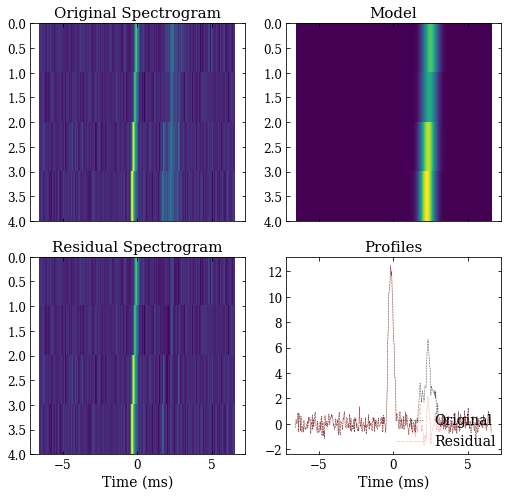

2022-06-08 08:19:50,865 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:19:50,866 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:19:50,869 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:19:50,870 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 08:19:50,872 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:19:50,873 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:19:50,876 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.7915222492904027
2022-06-08 08:19:50,878 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-06-08 08:19:50,879 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-06-08 08:19:50,881 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-06-08 08:19:50,909 - initial_profile

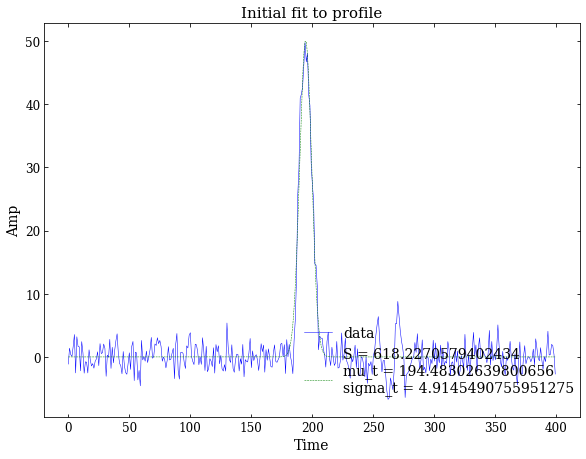

2022-06-08 08:19:51,253 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 08:19:51,257 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7fe5d2a68400>
[0.2202872238075835 0.2536038405772934 0.4386294712804521
 0.39524615247692546]


2022-06-08 08:19:51,262 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 08:19:51,263 - initial_spectrafit -burstfit.fit - INFO - c0: 0.2202872238075835 +- 0.0
2022-06-08 08:19:51,266 - initial_spectrafit -burstfit.fit - INFO - c1: 0.2536038405772934 +- 0.0
2022-06-08 08:19:51,267 - initial_spectrafit -burstfit.fit - INFO - c2: 0.4386294712804521 +- 0.0


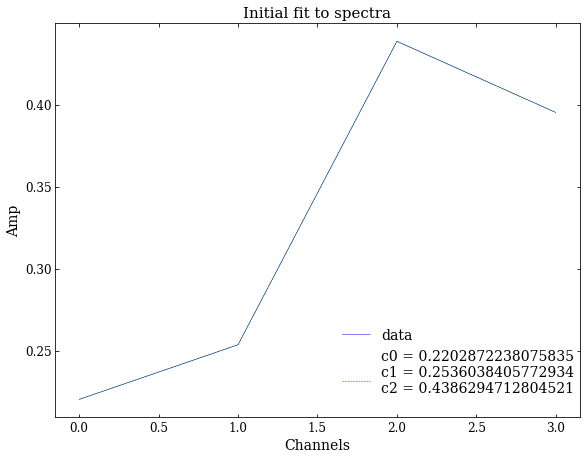

2022-06-08 08:19:51,559 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-06-08 08:19:51,564 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.2202872238075835, 0.2536038405772934, 0.4386294712804521, 618.2270579402434, 194.48302639800656, 4.9145490755951275, 263.0]
2022-06-08 08:19:51,668 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 08:19:51,671 - sgram_fit -burstfit.fit - INFO - c0: 0.2823514141837894 +- 0.008043145588800444
2022-06-08 08:19:51,673 - sgram_fit -burstfit.fit - INFO - c1: 0.2732588383557543 +- 0.006644985305649586
2022-06-08 08:19:51,676 - sgram_fit -burstfit.fit - INFO - c2: 0.3878724584411143 +- 0.0065554862638642075
2022-06-08 08:19:51,677 - sgram_fit -burstfit.fit - INFO - S: 519.9598401395276 +- 3.7991095210172223
2022-06-08 08:19:51,679 - sgram_fit -burstfit.fit - INFO - mu_t: 198.57957697260713 +- 0.13887325974654122
2022-06-08 08:19:51,680 - sgram_fit -burstfit.fit - INFO - sigma_t

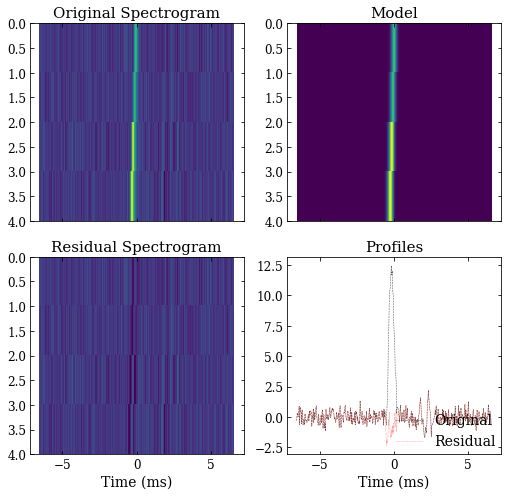

2022-06-08 08:19:52,296 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:19:52,298 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:19:52,304 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:19:52,306 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 08:19:52,308 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:19:52,316 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:19:52,320 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.6443515111123637
2022-06-08 08:19:52,322 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 08:19:52,323 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-06-08 08:19:52,325 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-

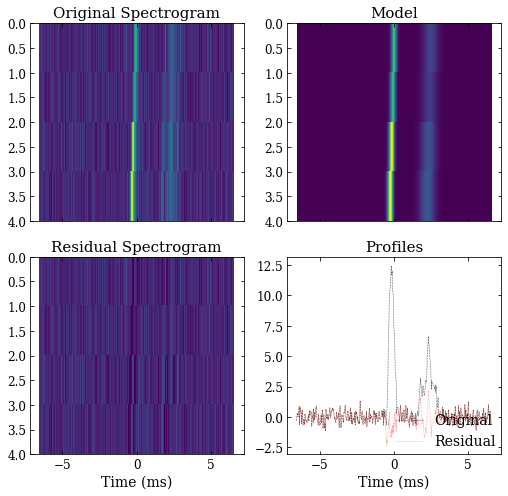

2022-06-08 08:19:53,082 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:19:53,084 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:19:53,088 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:19:53,090 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-06-08 08:19:53,092 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:19:53,095 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:19:53,099 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.6443515111123637
2022-06-08 08:19:53,102 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 08:19:53,104 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 08:19:53,108 - tests -root - INFO - P values: T-test (0.89137), Kruskal (0.80646), KS (0.95226), F-test (0.18550)
2022-06-08 08:1

{bf}.calc_redchisq()= 1.6443515111123637


In [18]:
bf_S1T1_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 180, 0),(np.inf, 300, 5*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)

### with scattering

self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 08:22:47,475 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 08:22:47,478 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 08:22:47,482 - tests -root - INFO - P values: T-test (0.89137), Kruskal (0.80646), KS (0.95226), F-test (0.18550)
2022-06-08 08:22:47,484 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 08:22:47,488 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00000)
2022-06-08 08:22:47,490 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 08:22:47,495 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00000)
2022-06-08 08:22:47,497 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 08:22:47,498 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 08:22:47,500 - initial_profi

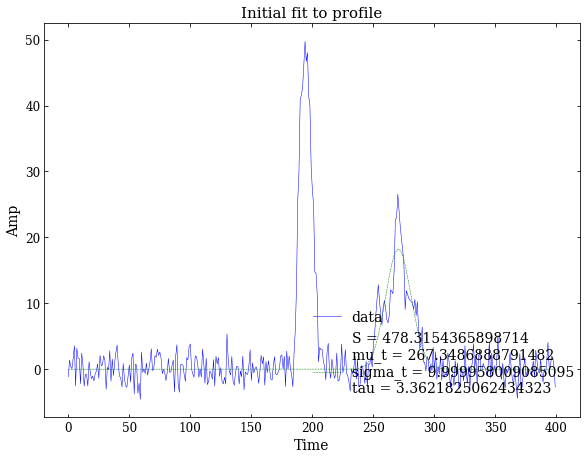

2022-06-08 08:22:47,779 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 08:22:47,780 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7fe5d2a68400>
[0.31443444 0.26145935 0.37422445 0.41419798]


2022-06-08 08:22:47,783 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 08:22:47,784 - initial_spectrafit -burstfit.fit - INFO - c0: 0.3144344389438629 +- 0.0
2022-06-08 08:22:47,786 - initial_spectrafit -burstfit.fit - INFO - c1: 0.2614593505859375 +- 0.0
2022-06-08 08:22:47,787 - initial_spectrafit -burstfit.fit - INFO - c2: 0.374224454164505 +- 0.0


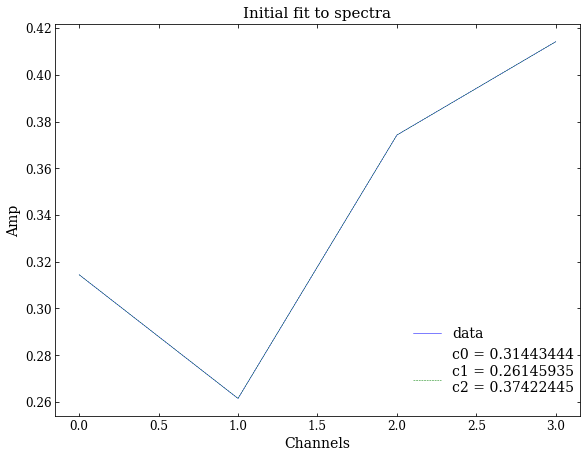

2022-06-08 08:22:47,971 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 08:22:47,995 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.31443444, 0.26145935, 0.37422445, 478.3154365898714, 267.3486888791482, 9.999958009085095, 3.3621825062434323, 263.0]
2022-06-08 08:22:48,117 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 08:22:48,124 - sgram_fit -burstfit.fit - INFO - c0: 0.2904660002853209 +- 0.037125258748681646
2022-06-08 08:22:48,126 - sgram_fit -burstfit.fit - INFO - c1: 0.26337535150880176 +- 0.03168119019714776
2022-06-08 08:22:48,128 - sgram_fit -burstfit.fit - INFO - c2: 0.3871179320089722 +- 0.03148298870074072
2022-06-08 08:22:48,130 - sgram_fit -burstfit.fit - INFO - S: 407.6188971896056 +- 12.789490030089665
2022-06-08 08:22:48,132 - sgram_fit -burstfit.fit - INFO - mu_t: 271.0671340273014 +- 1.7749689325046685
2022-06-08 08:22:48,134 - sgram_fit -burstfit.fit - INFO - sigma_t: 11.25421

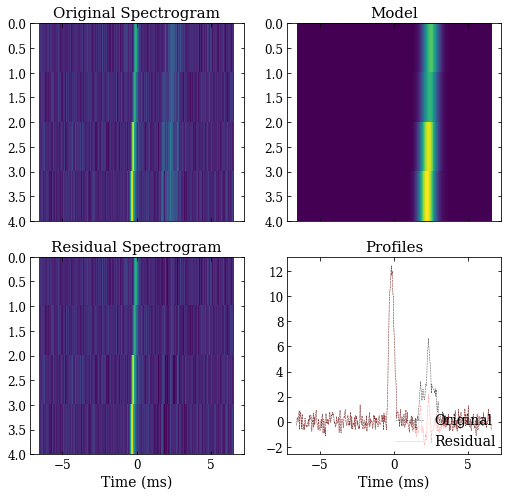

2022-06-08 08:22:48,655 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:22:48,658 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:22:48,662 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:22:48,664 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 08:22:48,666 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:22:48,668 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:22:48,672 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.8393139703103827
2022-06-08 08:22:48,673 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 08:22:48,675 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-08 08:22:48,677 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to

{bf}.calc_redchisq()= 1.8393139703103827


In [25]:
bf_S1T2_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 180, 0, 0),(np.inf, 300, 5*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)


self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 08:22:24,511 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 08:22:24,515 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 08:22:24,519 - tests -root - INFO - P values: T-test (0.89137), Kruskal (0.80646), KS (0.95226), F-test (0.18550)
2022-06-08 08:22:24,522 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 08:22:24,525 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00000)
2022-06-08 08:22:24,527 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 08:22:24,530 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00000)
2022-06-08 08:22:24,532 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 08:22:24,534 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 08:22:24,535 - initial_profi

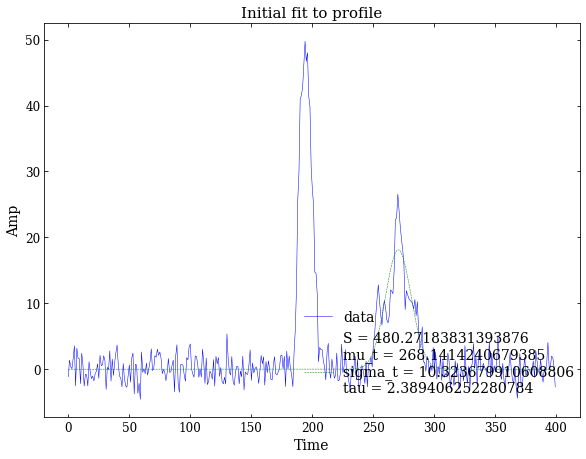

2022-06-08 08:22:24,896 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 08:22:24,898 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7fe5d2a68400>
[0.3178077  0.2591119  0.37252125 0.41892594]


2022-06-08 08:22:24,905 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 08:22:24,908 - initial_spectrafit -burstfit.fit - INFO - c0: 0.31780770421028137 +- 0.0
2022-06-08 08:22:24,910 - initial_spectrafit -burstfit.fit - INFO - c1: 0.2591119110584259 +- 0.0
2022-06-08 08:22:24,912 - initial_spectrafit -burstfit.fit - INFO - c2: 0.3725212514400482 +- 0.0


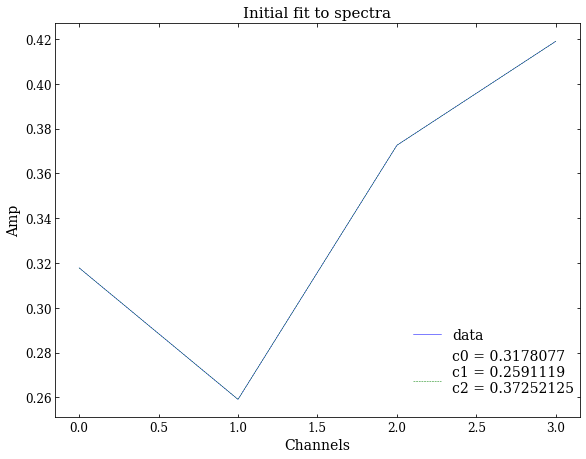

2022-06-08 08:22:25,105 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 08:22:25,107 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.3178077, 0.2591119, 0.37252125, 480.27183831393876, 268.1414240679385, 10.323679910608806, 2.389406252280784, 263.0]
2022-06-08 08:22:25,193 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 08:22:25,195 - sgram_fit -burstfit.fit - INFO - c0: 0.295680808818924 +- 0.03868149372133166
2022-06-08 08:22:25,201 - sgram_fit -burstfit.fit - INFO - c1: 0.26071179309218595 +- 0.032913386698753454
2022-06-08 08:22:25,203 - sgram_fit -burstfit.fit - INFO - c2: 0.3807895352372391 +- 0.03192155858559365
2022-06-08 08:22:25,205 - sgram_fit -burstfit.fit - INFO - S: 387.84444996098784 +- 11.256821310131011
2022-06-08 08:22:25,206 - sgram_fit -burstfit.fit - INFO - mu_t: 271.2452808235671 +- 1.794320343473263
2022-06-08 08:22:25,209 - sgram_fit -burstfit.fit - INFO - sigma_t: 11.3584853

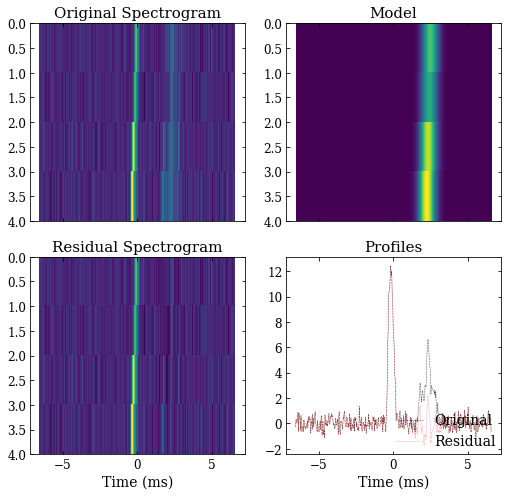

2022-06-08 08:22:25,734 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:22:25,743 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:22:25,746 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:22:25,748 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 08:22:25,750 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:22:25,751 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 08:22:25,755 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 2.659699598761711
2022-06-08 08:22:25,756 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-06-08 08:22:25,762 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-06-08 08:22:25,772 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-06-08 08:22:27,110 - initial_profilef

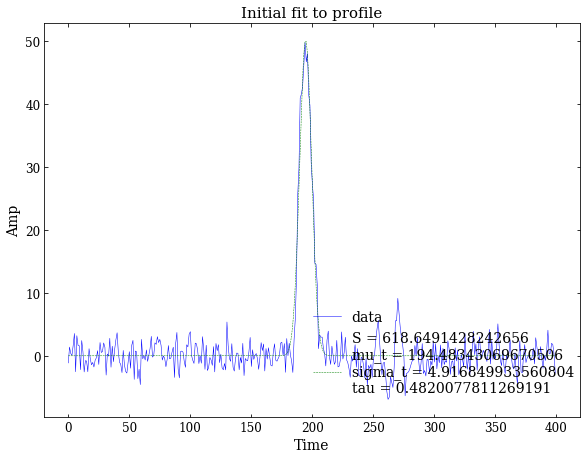

2022-06-08 08:22:27,271 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 08:22:27,274 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7fe5d2a68400>
[0.22028722378270005 0.25360384055218194 0.43862947126123575
 0.39524615259046486]


2022-06-08 08:22:27,280 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 08:22:27,282 - initial_spectrafit -burstfit.fit - INFO - c0: 0.22028722378270005 +- 0.0
2022-06-08 08:22:27,283 - initial_spectrafit -burstfit.fit - INFO - c1: 0.25360384055218194 +- 0.0
2022-06-08 08:22:27,284 - initial_spectrafit -burstfit.fit - INFO - c2: 0.43862947126123575 +- 0.0


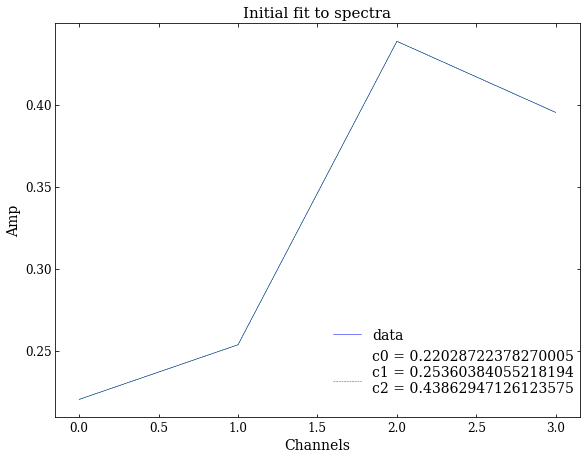

2022-06-08 08:22:27,443 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-06-08 08:22:27,445 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.22028722378270005, 0.25360384055218194, 0.43862947126123575, 618.6491428242656, 194.48343069670506, 4.916849933560804, 0.4820077811269191, 263.0]
2022-06-08 08:22:27,574 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 08:22:27,577 - sgram_fit -burstfit.fit - INFO - c0: 0.28481417219700933 +- 0.008244621969742622
2022-06-08 08:22:27,579 - sgram_fit -burstfit.fit - INFO - c1: 0.266951454875784 +- 0.00672417433957211
2022-06-08 08:22:27,580 - sgram_fit -burstfit.fit - INFO - c2: 0.3863486833753211 +- 0.0067430972929220165
2022-06-08 08:22:27,582 - sgram_fit -burstfit.fit - INFO - S: 499.23276863760725 +- 3.733921198313697
2022-06-08 08:22:27,583 - sgram_fit -burstfit.fit - INFO - mu_t: 198.1418219340327 +- 0.09752775231500797
2022-06-08 08:22:27,585 - sgram_fit -burstfit.

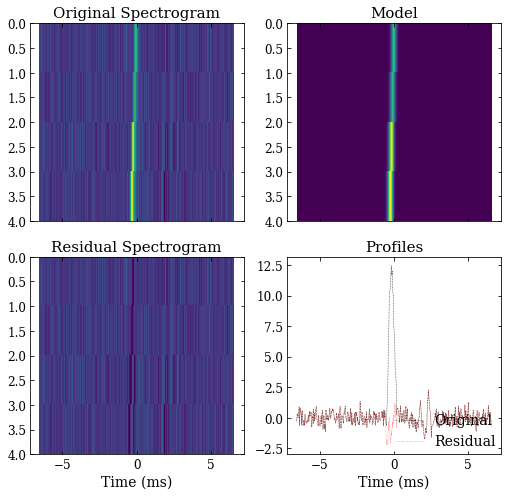

2022-06-08 08:22:28,243 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:22:28,245 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:22:28,249 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:22:28,251 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 08:22:28,253 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:22:28,254 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:22:28,269 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.6101941012899335
2022-06-08 08:22:28,273 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 08:22:28,274 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-06-08 08:22:28,276 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-

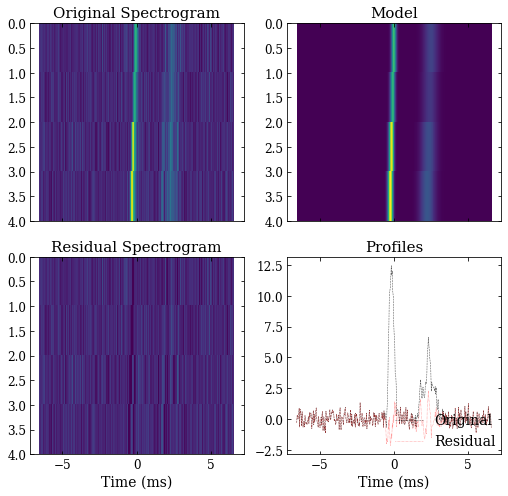

2022-06-08 08:22:29,228 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:22:29,229 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:22:29,233 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 08:22:29,234 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-06-08 08:22:29,236 - model -burstfit.fit - INFO - Making model.
2022-06-08 08:22:29,237 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 08:22:29,241 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.569953691535381
2022-06-08 08:22:29,243 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 08:22:29,244 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 08:22:29,247 - tests -root - INFO - P values: T-test (0.89137), Kruskal (0.80646), KS (0.95226), F-test (0.18550)
2022-06-08 08:22

{bf}.calc_redchisq()= 1.569953691535381


In [23]:
bf_S1T2_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 180, 0, 0),(np.inf, 350, 10*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)


### Run MCMC after checking all curvfit results

2022-06-08 08:23:20,658 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 08:23:20,661 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [3.06729581e-01 2.58571173e-01 3.78707021e-01 3.68247088e+02
 2.73850489e+02 1.09434173e+01 2.62432403e+02]
2022-06-08 08:23:20,663 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 08:23:20,665 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 08:23:20,666 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-06-08 08:23:20,675 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022-06-08 08:23:20,676 - run_mcmc -burstfit.mcmc - INFO - Priors used in MCMC are:
2022-06-08 08:23:20,678 - run_mcmc -burst

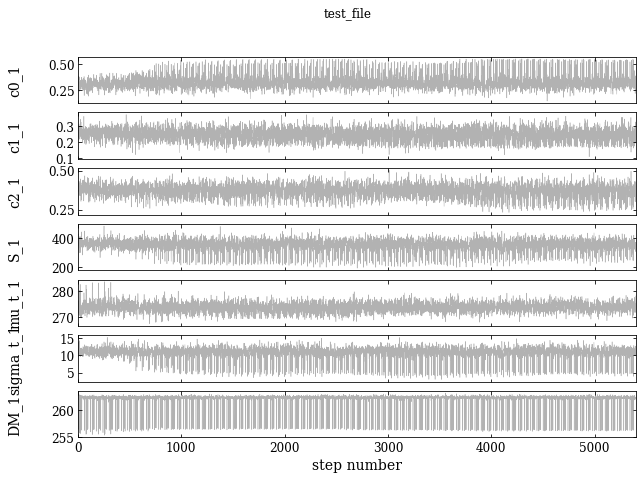

<Figure size 432x288 with 0 Axes>

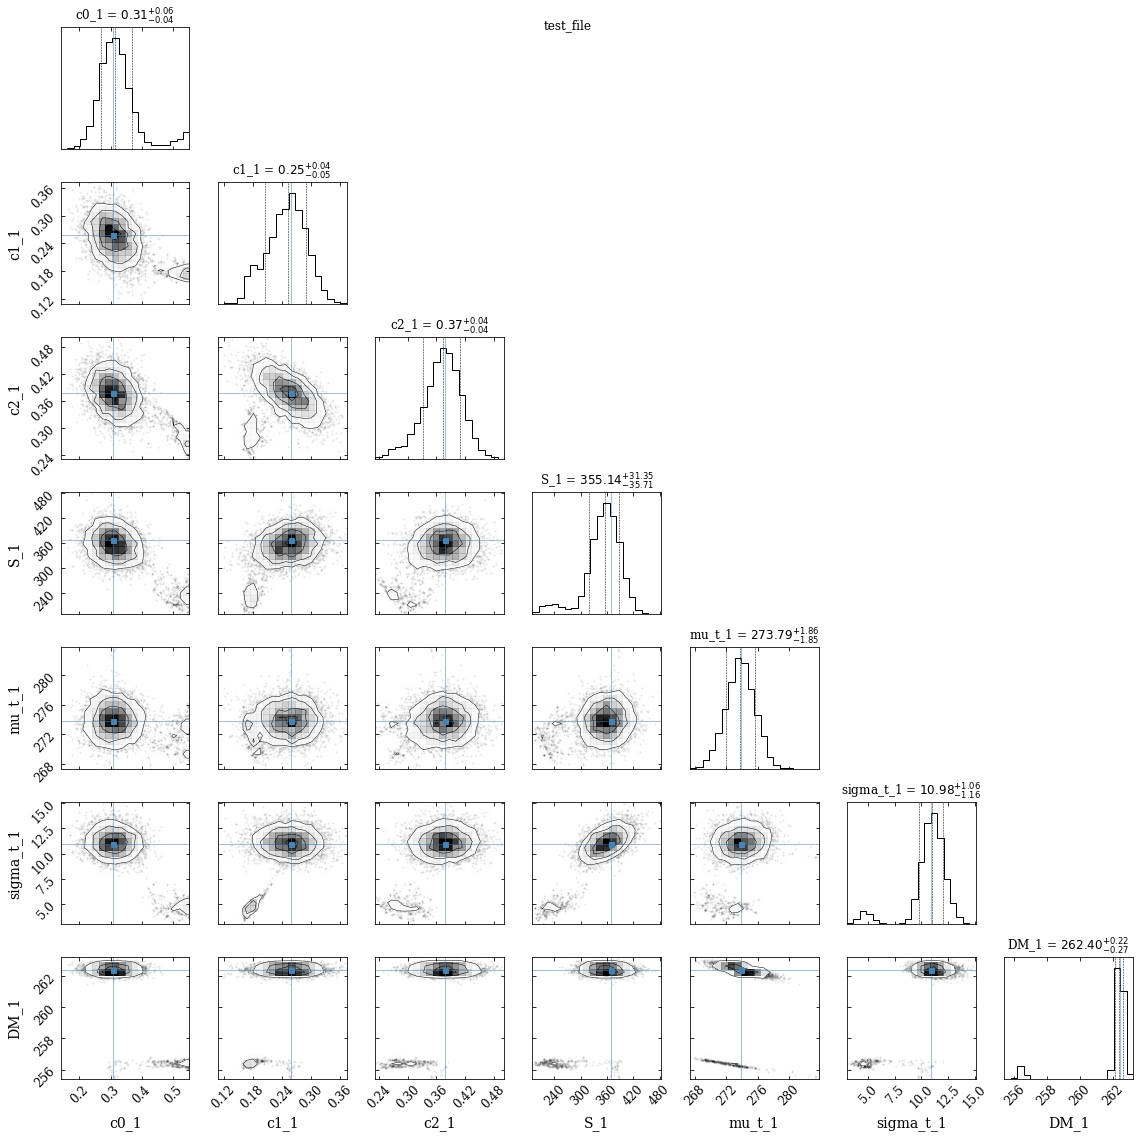

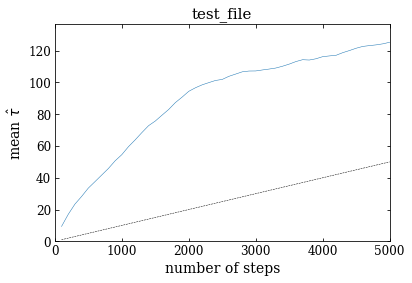

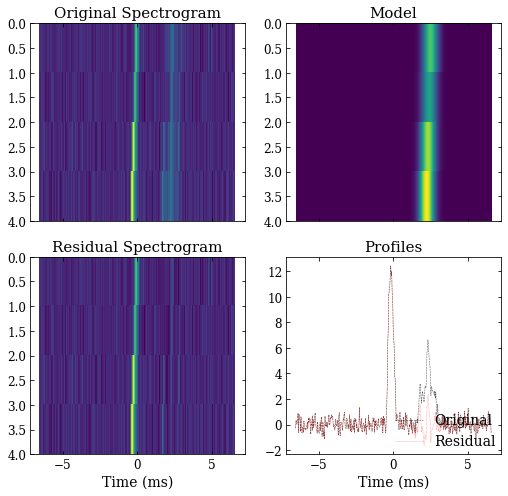

{bf}.bic =  1517.055785431184


0

In [26]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c1, mcmc=True)

2022-06-08 08:27:58,832 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 08:27:58,835 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [3.06729581e-01 2.58571173e-01 3.78707021e-01 3.68247088e+02
 2.73850489e+02 1.09434173e+01 2.62432403e+02 2.82351414e-01
 2.73258838e-01 3.87872458e-01 5.19959840e+02 1.98579577e+02
 4.06278486e+00 2.62357228e+02]
2022-06-08 08:27:58,839 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 08:27:58,843 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 08:27:58,845 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-06-08 08:27:58,855 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022-06-08 08:27:5

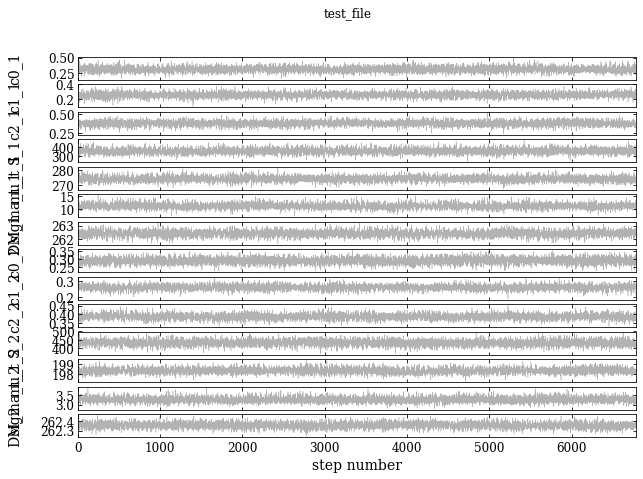

<Figure size 432x288 with 0 Axes>

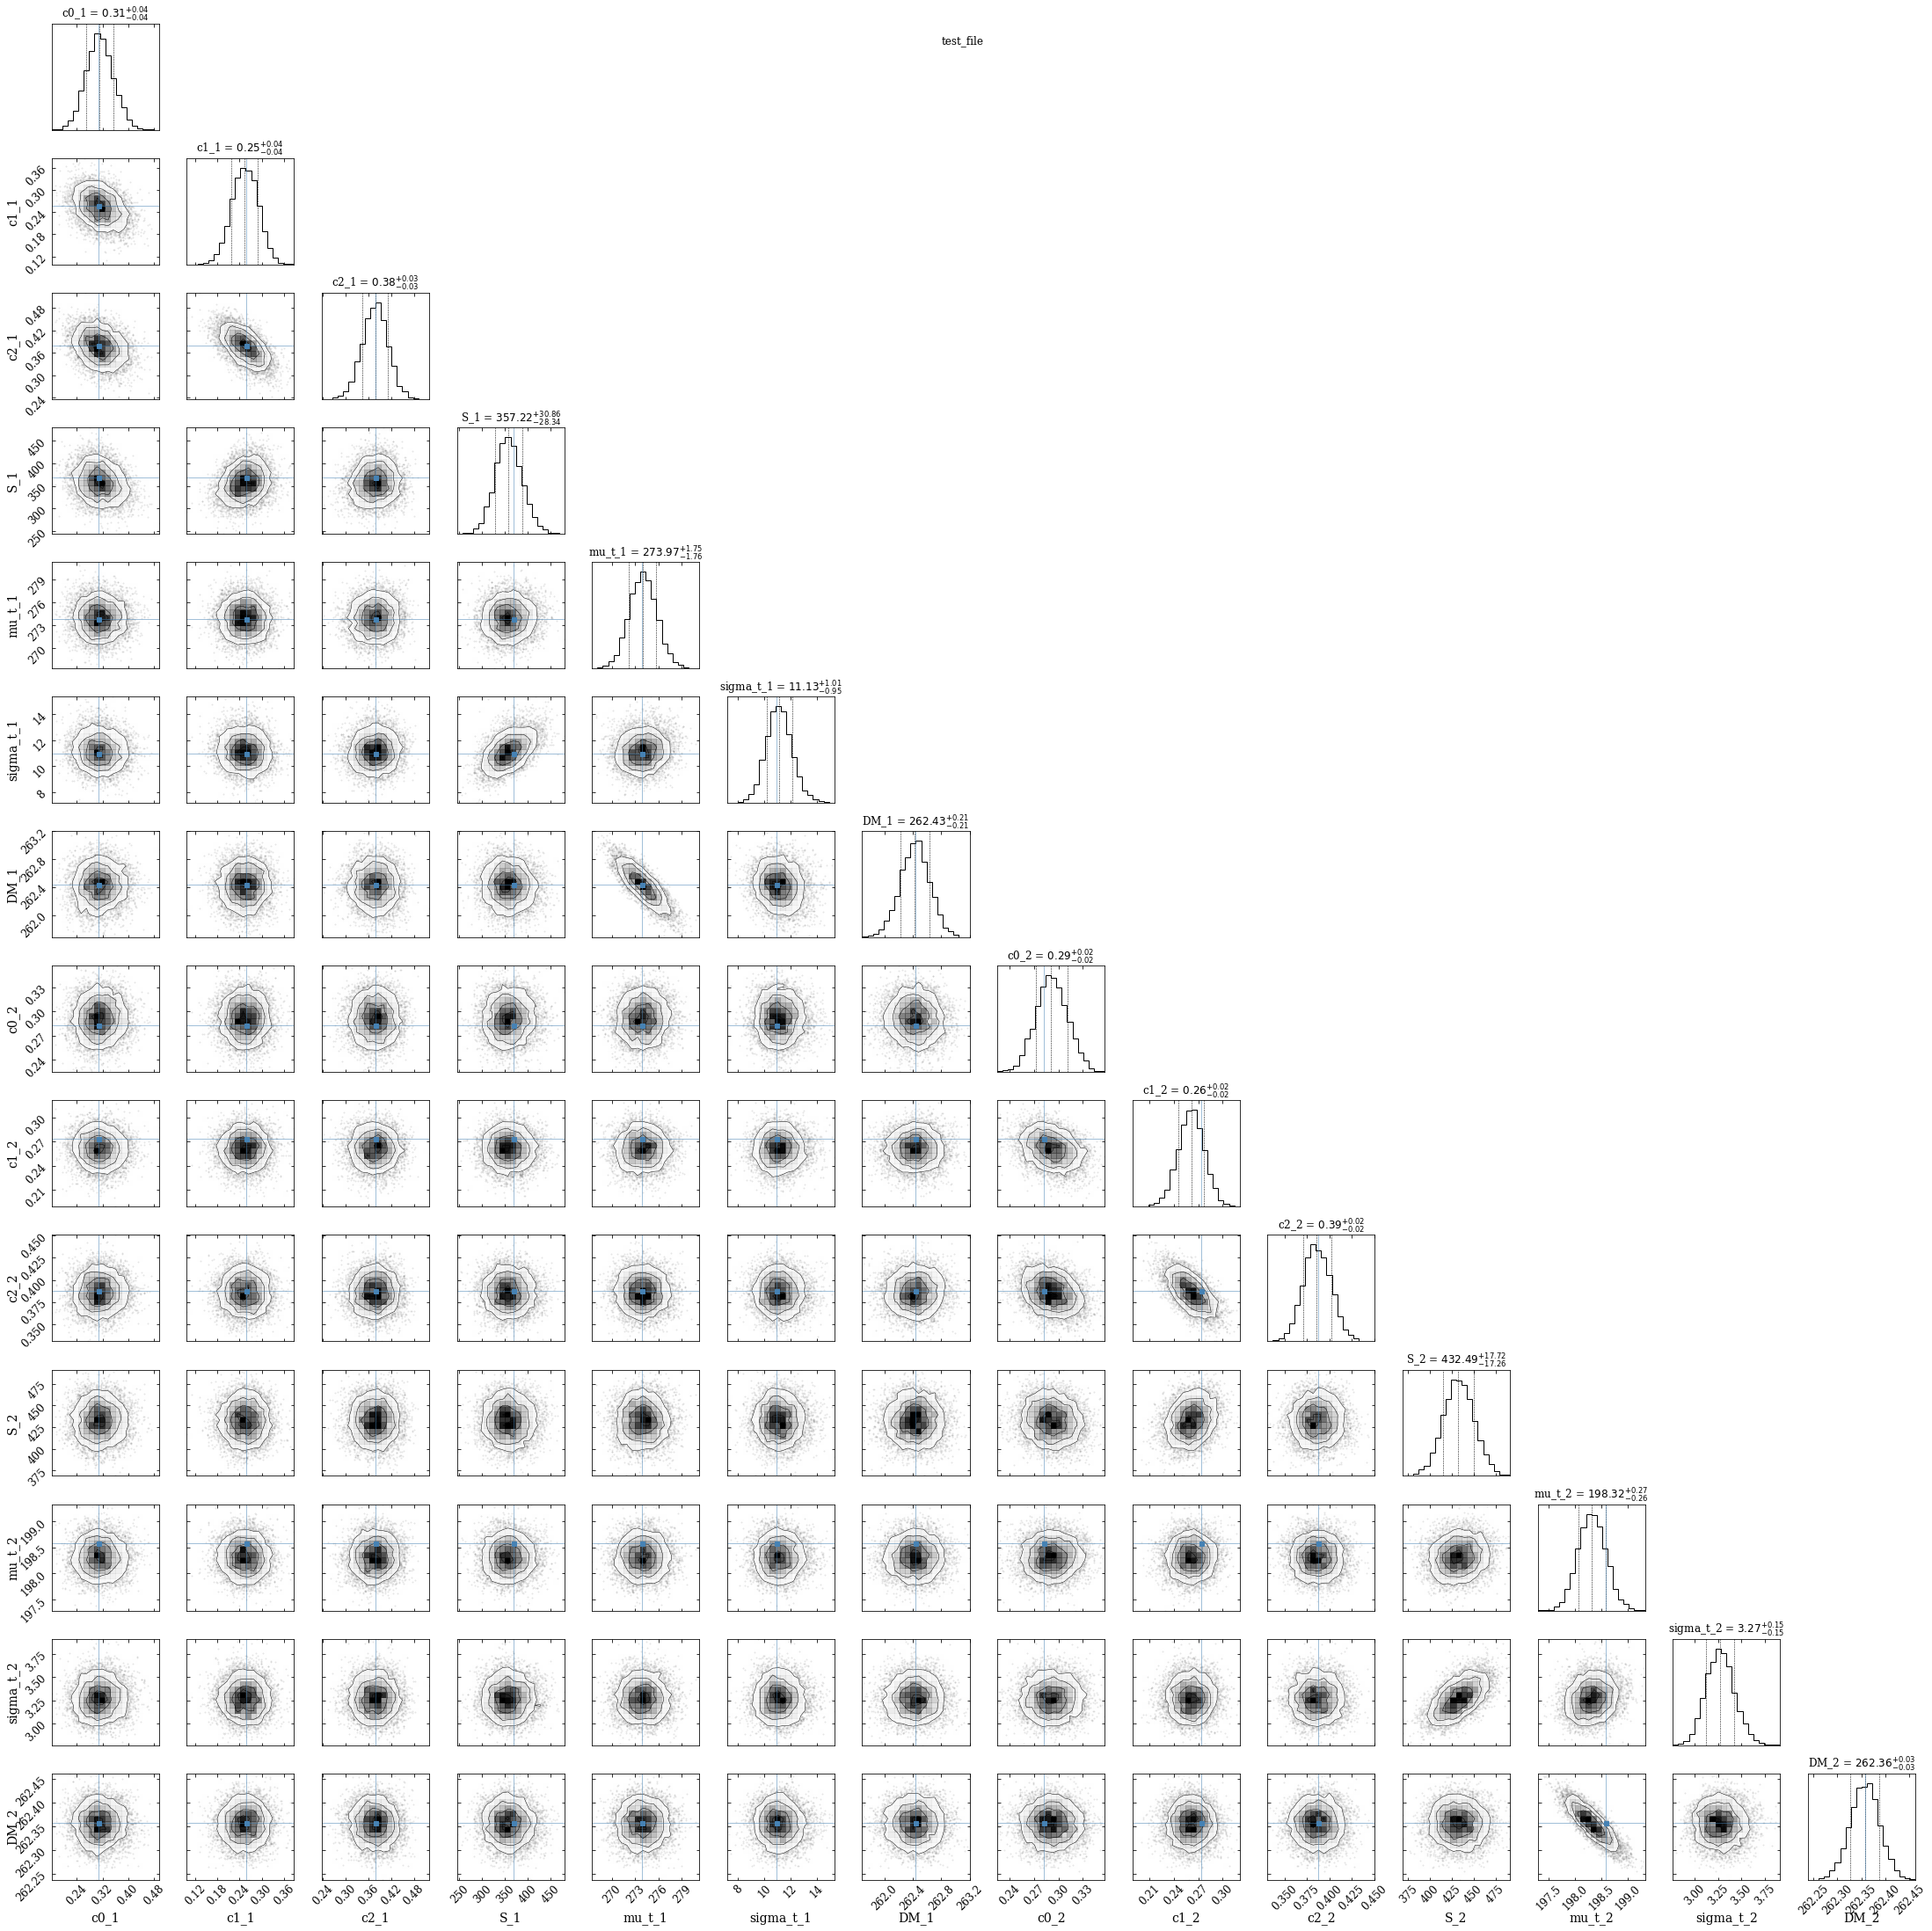

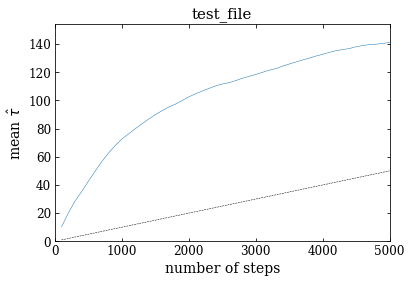

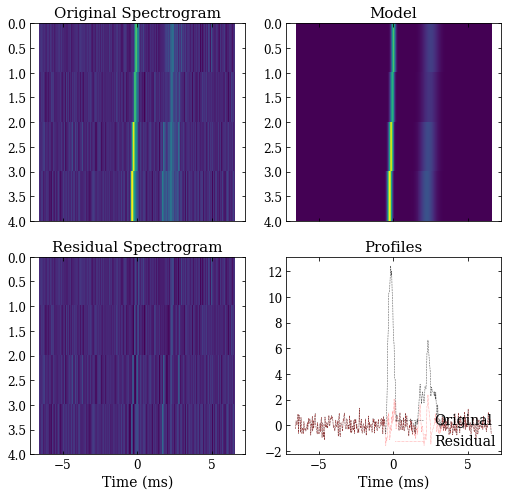

{bf}.bic =  429.3553441054224


0

In [27]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c2, mcmc=True)

2022-06-08 09:00:08,450 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 09:00:08,453 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [2.90466000e-01 2.63375352e-01 3.87117932e-01 4.07618897e+02
 2.71067134e+02 1.12542110e+01 3.12819735e+00 2.62268428e+02]
2022-06-08 09:00:08,456 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 09:00:08,458 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-06-08 09:00:08,460 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 09:00:08,462 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(5.630755235030946) + max_sigma_t_prior(20.25757980148145))
2022-06-08 09:00:08,465 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*m

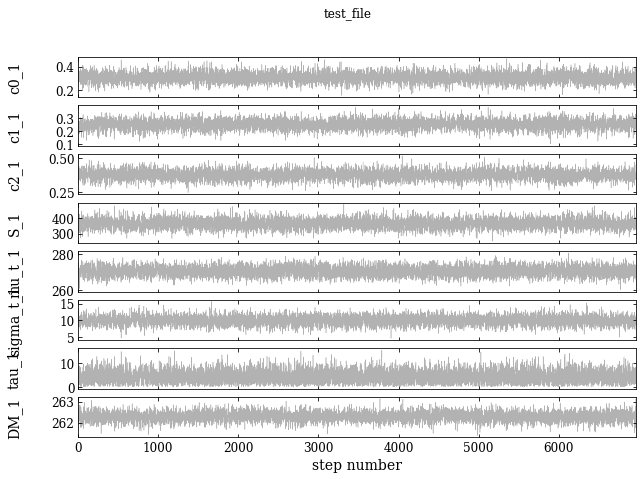

<Figure size 432x288 with 0 Axes>

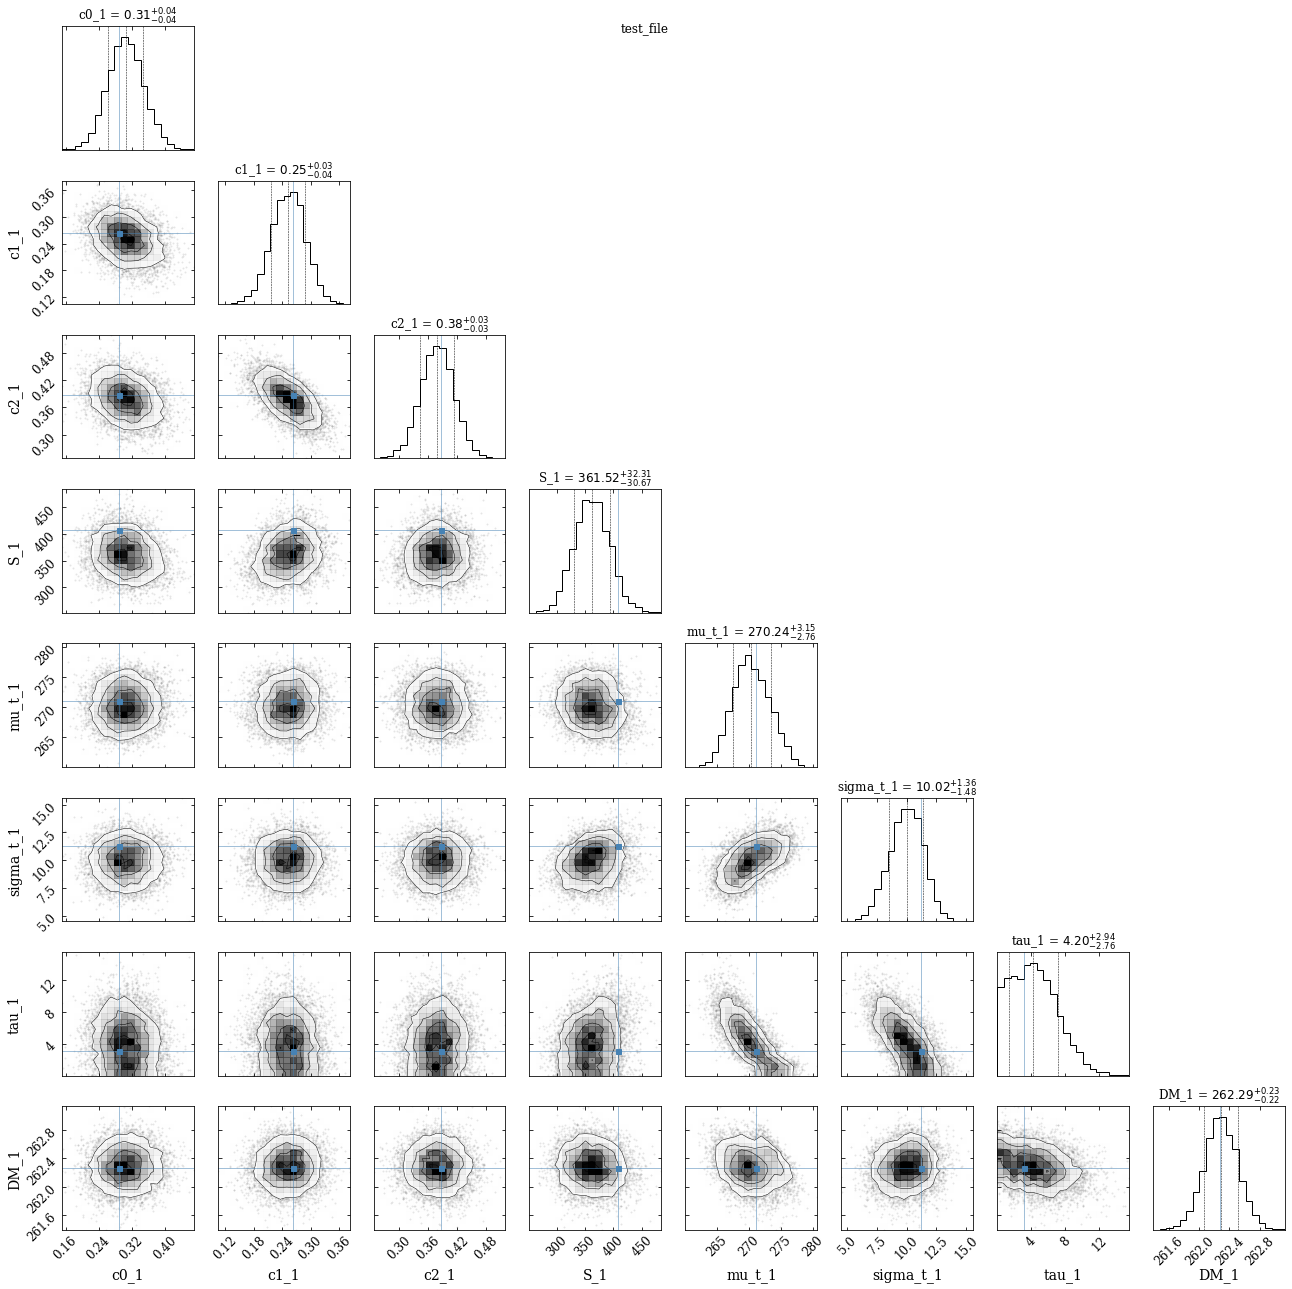

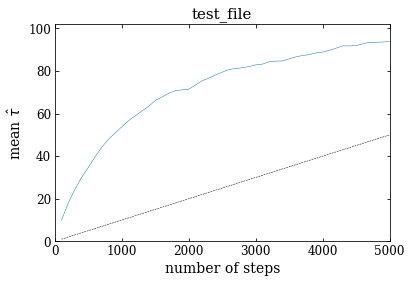

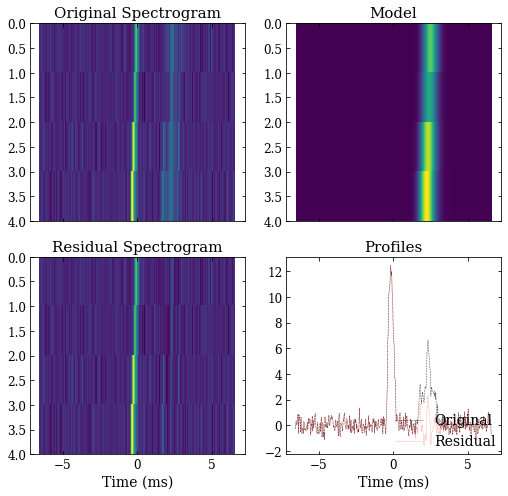

{bf}.bic =  1526.5468308519935


0

In [45]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c1, mcmc=True)

2022-06-08 08:42:13,253 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 08:42:13,256 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [3.08425075e-01 2.52950457e-01 3.79099446e-01 3.61364368e+02
 2.71339016e+02 1.05035861e+01 2.80097128e+00 2.62313832e+02
 2.85823037e-01 2.65805834e-01 3.87255285e-01 4.87851697e+02
 1.98134880e+02 3.77810894e+00 4.85950800e-01 2.62349801e+02]
2022-06-08 08:42:13,257 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 08:42:13,259 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-06-08 08:42:13,260 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 08:42:13,261 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(5.041748301759901) + max_sigma_t_prior(18.906455048116285))
2022-06-08 08:42:13,2

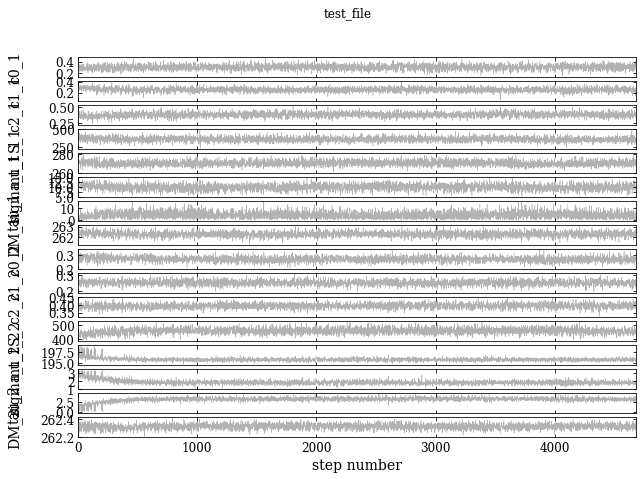

<Figure size 432x288 with 0 Axes>

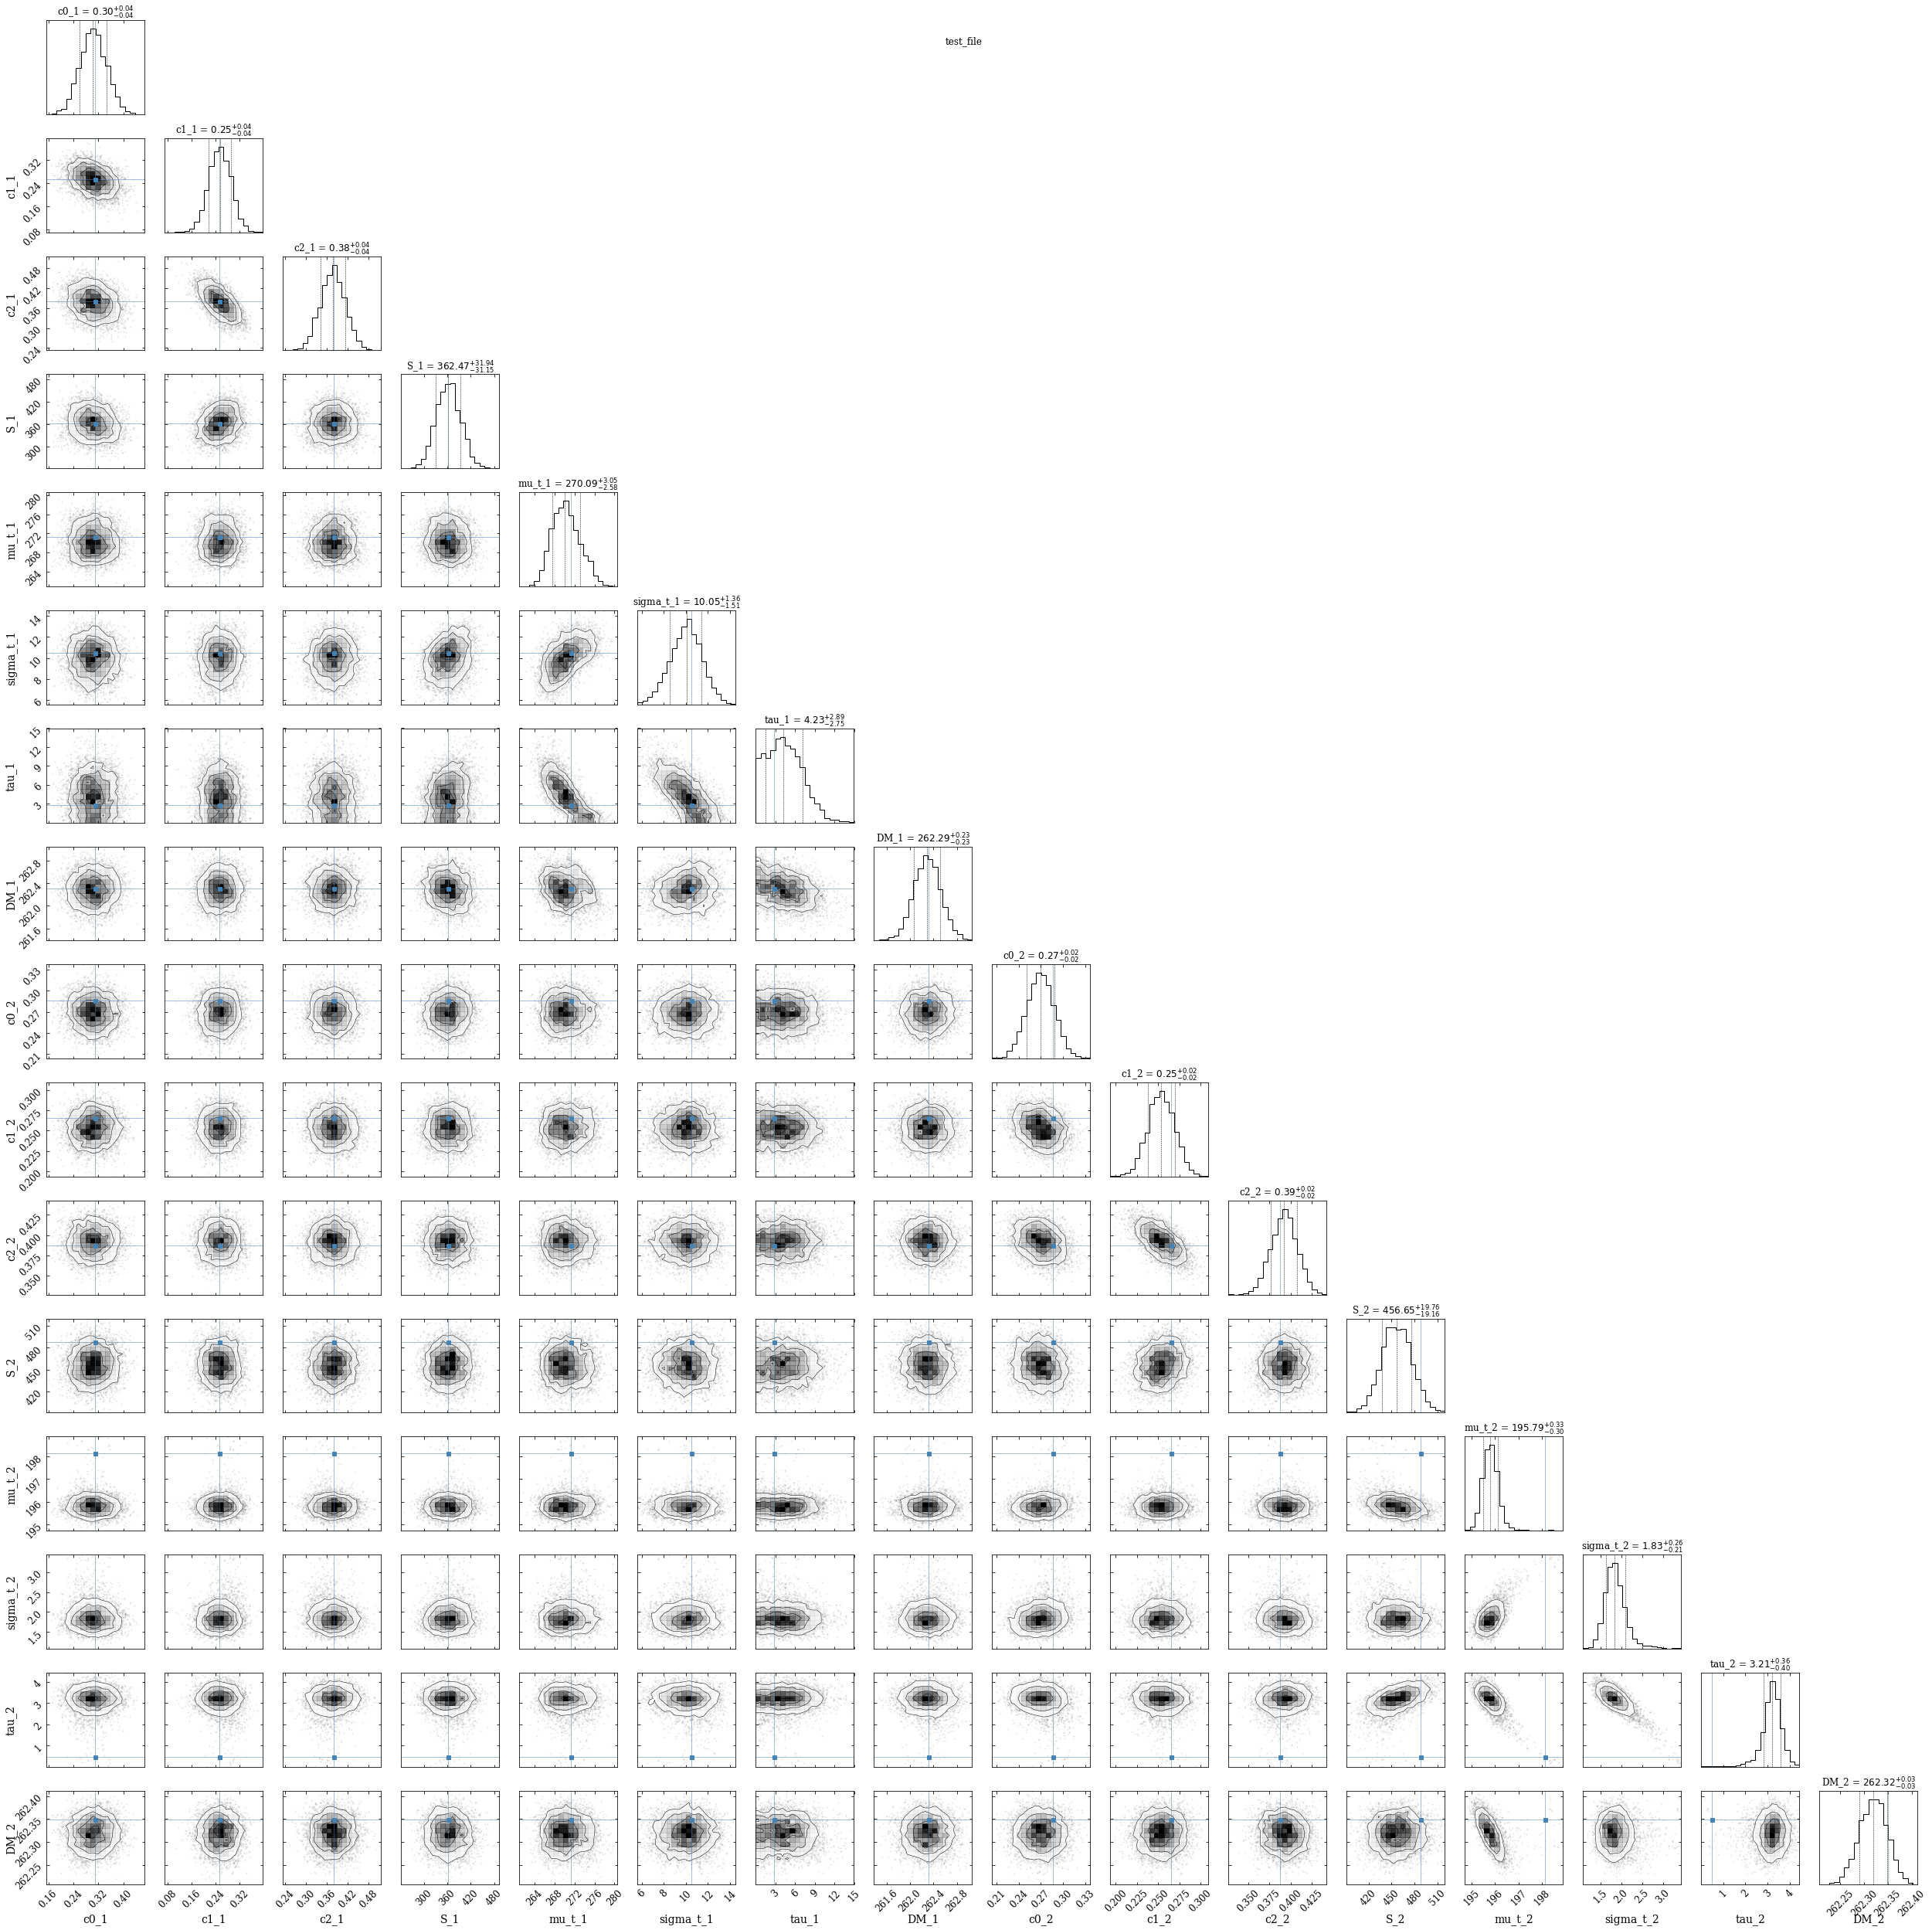

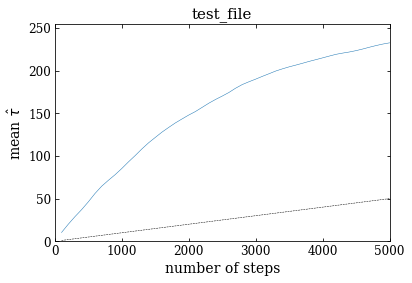

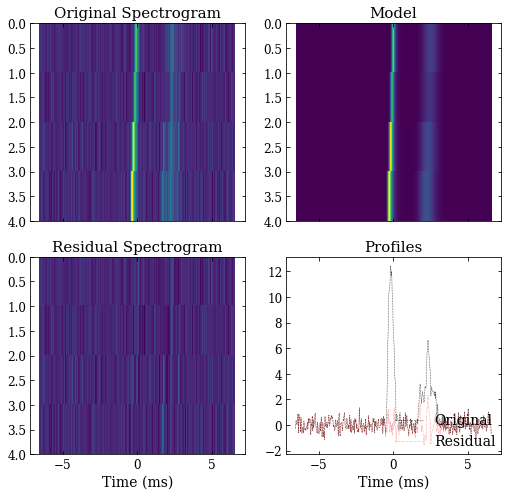

{bf}.bic =  428.13192880784624


0

In [29]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c2, mcmc=True)

### select model and save results 

In [51]:
def select_model(bf_name_list):
    bf_with_bic_list = []
    bic_list = []
    
    for name in bf_name_list:

        if name in globals() or name in locals():
            bf = globals()[name]

            if bf.bic is None: 
                print("%s.bic not found"%name)

            else:         
                bf_with_bic_list = np.append(bf_with_bic_list, name)
                bic_list = np.append(bic_list, bf.bic)
        
        else:
            print("%s not used"%name)

    sorted_bf = ([x for _,x in sorted(zip(bic_list, bf_with_bic_list))])  
    sorted_bic = sorted(bic_list)

    print(sorted_bf) 
    print(sorted_bic)
    
    return sorted_bf, sorted_bic


def save_results(file, candidate, bf_name):
    bf_best = globals()[bf_name]
    with open(file, "a") as f:
        print(candidate, file=f)
        print(bf_name, file=f)
        for ncomp in range(bf_best.ncomponents):
            for i in range(len(bf_best.param_names)):
                print("${:.4}^{{+{:.2}}}_{{-{:.2}}}$".format(bf_best.mcmc_params[ncomp + 1]['popt'][i], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][0], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][1]),
                     file=f) 
                
        print("\n", file = f)
    
    return 0



# sorted_bf, sorted_bic = paper_fit.select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])
# paper_fit.save_results(file, candidate, bf_name)

sorted_bf, sorted_bic = select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])

file = "paper_fit_result.txt"
bf_name = sorted_bf[0]
save_results(file, candidate, bf_name)

bf_S1T1_c3 not used
bf_S1T2_c3.bic not found
['bf_S1T2_c2', 'bf_S1T1_c2', 'bf_S1T1_c1', 'bf_S1T2_c1']
[428.13192880784624, 429.3553441054224, 1517.055785431184, 1526.5468308519935]
